# Assignment: Extending ML Regression on the Diabetes Dataset

In the previous Assignment on Regression, you performed regression on [scikit-learn's diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) with linear regression and k-nearest neighbors using only the most correlated variable.  

We are going to repeat the same process, only now we will use all variables, incorporate more ML workflow fundamentals, and include decision tree models.

* In the below, you can add any additional code cells you need

Execute the following cell to get us started.

In [1]:
# Import scikit-learn's example diabetes dataset
import sklearn.datasets 
diabetes = sklearn.datasets.load_diabetes()

# Print a description of the dataset
print(diabetes.DESCR)

# Get the feature and target arrays
x = diabetes.data
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## ML steps

In the prior assignment notebook, you performed regression using the feature in x that had the highest correlation coefficient with y.  In all the models for this assignment, use all 10 features when training and assessing your models.

First, do multilinear regression with all 10 features, including the following steps:
* Split your data into a training set and a test set
* Train the model
  * Note that when you pass any feature data like `x` into the fit method (like `fit(x,y)`), `x` is a 2D numpy array (or 2D dataframe) that has a size of number_of_samples by number_of_features. When you trained a model on one feature variable, `x` needed to have a size of number_of_samples by 1. If you train on n features, then `x` should have a size of number_of_samples by n.
* Print the intercept and coefficients of the model
* Print the mean squared error and R$^2$ values for your model assessed against the test data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make 1 feature data frame
x_one = x[:, [2]]

# split 

x_one_train, x_one_test, y_one_train, y_one_test = train_test_split(x_one, y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state=42)
model = LinearRegression()

# Model fit
model.fit(x_train, y_train)

# Print coef and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 151.6651755919933
Coefficients: [  47.74968054 -241.99090728  531.97106288  381.56286182 -918.50290455
  508.25778252  116.95016447  269.4923028   695.80811712   26.32458203]


In [3]:
# Make predictions
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_lr = mse
r2_lr = r2

print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 2848.3106508475053
R2 Score: 0.4849058889476756


### For one feature data

In [4]:
# Model fit
model.fit(x_one_train, y_one_train)

# Print coef and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 155.19204813073685
Coefficients: [871.09248141]


In [5]:
# Make predictions
y_pred = model.predict(x_one_test)
mse = mean_squared_error(y_one_test, y_pred)
r2 = r2_score(y_one_test, y_pred)


# Print mse and r2
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 3381.4409335887676
R2 Score: 0.48362014815749144


Compare your model's results against the results obtained when training on just one feature.

Repeat the regression again using all feature variables, but now:
* Use the k-nearest neighbors algorithm rather than linear regression
* When doing so, use cross-validation to obtain the optimal number of neighbors before training your final model

### KNN ###

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = range(1, 15)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors = k)
    scores = cross_val_score(knn, x, y, scoring='r2')
    cv_scores.append(scores.mean())
cv_scores.sort()
print(cv_scores[-1])

best_k = k_values[np.argmax(cv_scores)]
print(best_k)

0.44767295527140344
14


In [7]:
# Double check
knn = KNeighborsRegressor(n_neighbors = 14)
scores = cross_val_score(knn, x, y, scoring='r2')
print(scores.mean())  

0.44767295527140344


In [8]:
final_knn = KNeighborsRegressor(n_neighbors = 14)
final_knn.fit(x, y)

y_pred_knn = final_knn.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn) 

r2_score = final_knn.score(x, y)

r2_knn = r2_score
print("R2 score:", r2_score)
#print(mse_knn)

R2 score: 0.5160994662468359


Now train a decision tree with scikit-learn's DecisionTreeRegressor:
* For this part, do not specifically initialize the value of any hyperparameters
* You should still evaluate the MSE and R$^2$ scores for your model on your test data
* In addition to quantifying performance, use a tree visualization method to show the trained decision tree model

### DecisionTreeRegressor

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_dt = mse
r2_dt = r2
# Print mse and r2
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 5816.756756756757
R2 Score: -0.05191375453998348


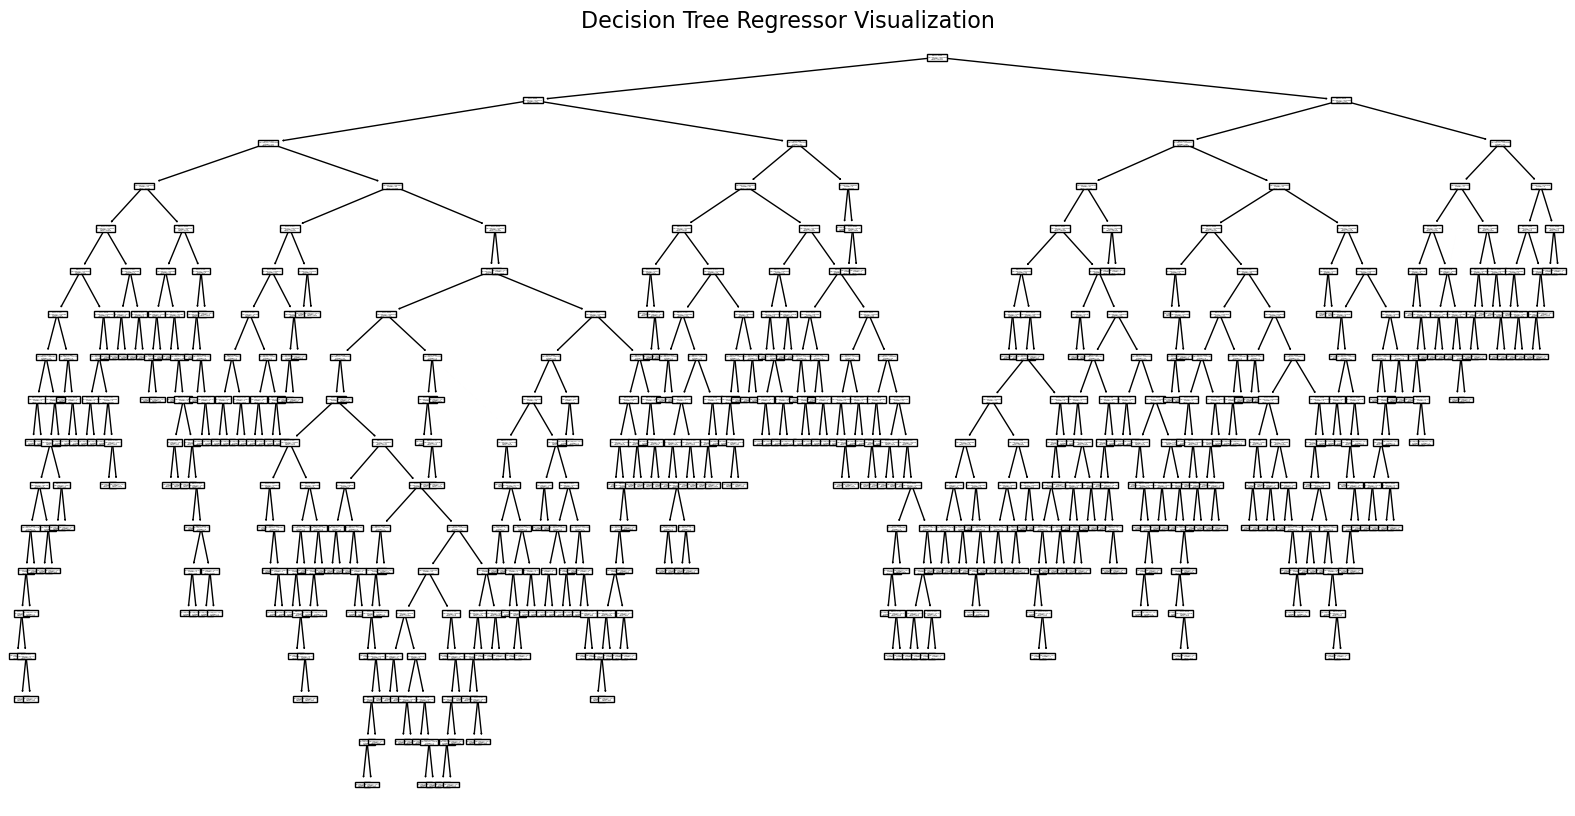

In [11]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names = [
    "age", 
    "sex", 
    "bmi", 
    "bp", 
    "s1", 
    "s2", 
    "s3", 
    "s4", 
    "s5", 
    "s6"
]
)
plt.title("Decision Tree Regressor Visualization", fontsize=16)
plt.show()

Finally, train a second decision tree for which you impose one or more constraints with regularization hyperparameters
* For example, you can use max_depth, max_leaf_nodes, or any other constraining parameter 
  * [DecisionTreeRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
* Use cross-validation to obtain the optimum value for your hyperparameter(s)
  * Plain cross-validation, K-folds cross-validation, or grid search cross-validation are all valid types of cross-validation to use here
* After you obtain the optimum hyperparameter values, train your model with the chosen hyperparameters
* Use a tree visualization method to show the trained decision tree model
* Evaluate the final MSE and R$^2$ scores for your model on your test data

### GridSearchCV

Best hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 5}
Best cross-validation R²: 0.31429142750288924
MSE: 3545.76
R2 Score: 0.359


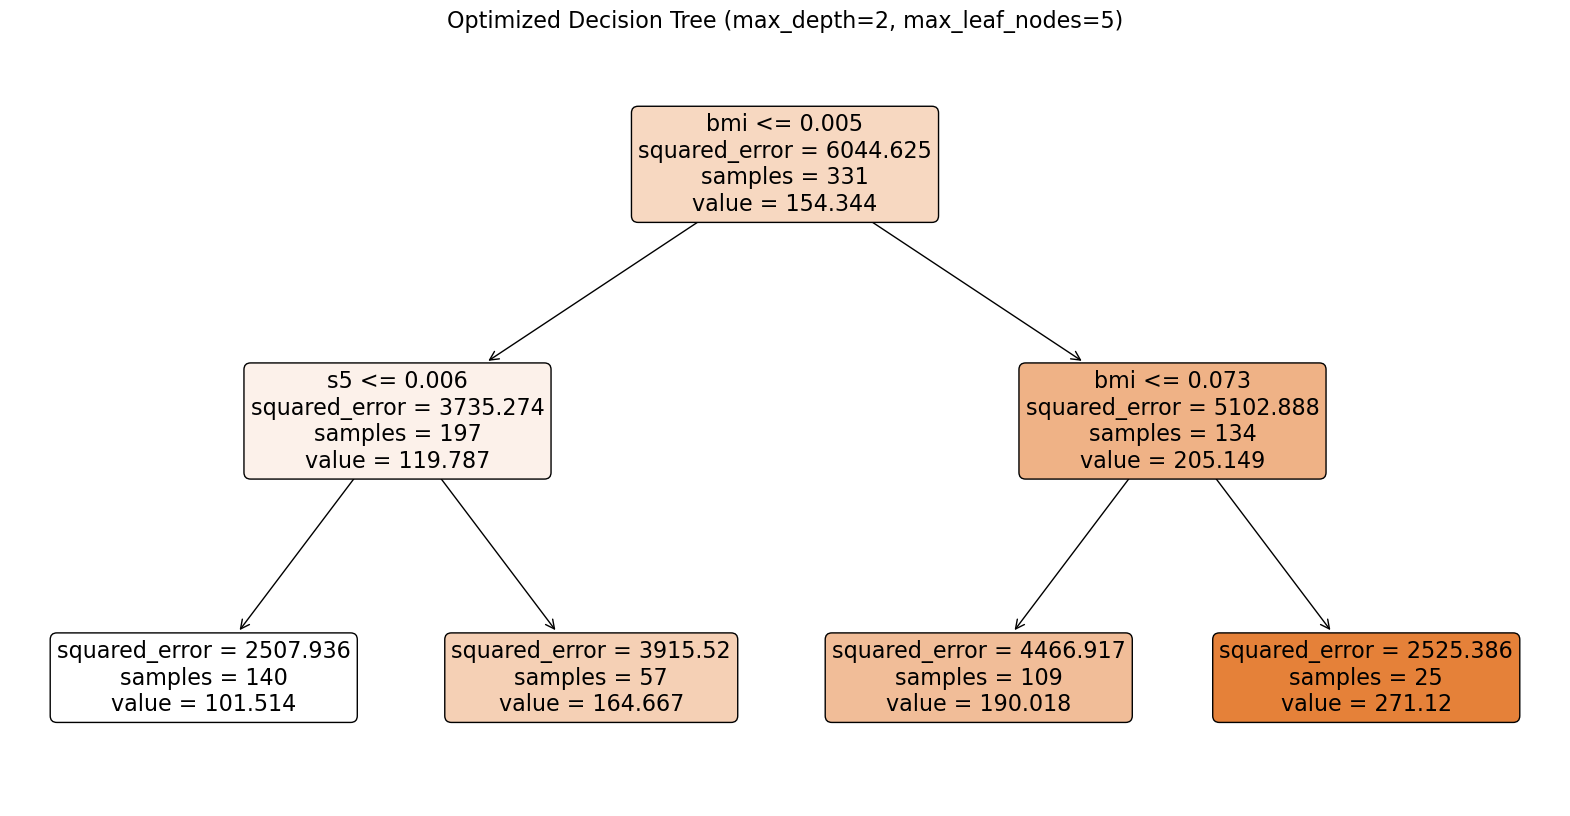

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [2, 3, 4, 5, 6, 8, 10],
    "max_leaf_nodes": [5, 10, 20, 30]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring="r2")
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation R²:", grid_search.best_score_)

best_tree = grid_search.best_estimator_
best_tree.fit(x_train, y_train)

y_pred = best_tree.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse_best = mse
r2_best = r2

print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.3f}")

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names = [
    "age", 
    "sex", 
    "bmi", 
    "bp", 
    "s1", 
    "s2", 
    "s3", 
    "s4", 
    "s5", 
    "s6"
],
    filled=True,
    rounded=True,
    fontsize=16
)
plt.title(f"Optimized Decision Tree (max_depth={best_tree.max_depth}, "
          f"max_leaf_nodes={best_tree.max_leaf_nodes})",
          fontsize=16)
plt.show()

Compare the MSE and R$^2$ scores for:
* your previous assignment's results with:
  * k-nearest neighbors with the most correlated feature
  * linear regression with the most correlated feature
* all the models of this assignment
  * k-nearest neighbors
  * multilinear regression
  * unregularized decision tree
  * regularized decision tree

Comment on what these metrics mean, how they can be used to compare the models, and how these comparisons illuminate (or don't) how the models' performance can be improved with more data or intelligent determination of regularization parameters.

### Compare MSE and R2

In [14]:
print(f"LinearRegression(all): MSE={mse_lr:.3f}, R2={r2_lr:.3f}")
print(f"KNN(k={best_k}): MSE={mse_knn:.3f}, R2={r2_knn:.3f}")
print(f"DecisionTree(default): MSE={mse_dt:.3f}, R2={r2_dt:.3f}")
print(f"DecisionTree(opt): MSE={mse_best:.3f}, R2={r2_best:.3f}")

LinearRegression(all): MSE=2848.311, R2=0.485
KNN(k=14): MSE=2382.817, R2=0.516
DecisionTree(default): MSE=5816.757, R2=-0.052
DecisionTree(opt): MSE=3545.759, R2=0.359


***Optional Bonus Part (2 extra points)***

Perform linear regression with all feature variables, but now use LASSO regularization with an alpha that results in zeroing out the coefficients of some features.
* Which features get zeroed out?
* Do you think it makes sense from a medical perspective to zero out those features?
* How does it affect the performance relative to linear regression without regularization?
* Can you find an alpha that gives improved performance?

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Try an alpha that will zero some coefficients
alpha = 0.1
lasso = Lasso(alpha=alpha, max_iter=5000)
lasso.fit(x_train, y_train)

# Predictions
y_pred = lasso.predict(x_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"LASSO (alpha={alpha}) → MSE={mse:.2f}, R2={r2:.3f}")

LASSO (alpha=0.1) → MSE=2753.92, R2=0.502


In [31]:
feature_names = [
    "age", 
    "sex", 
    "bmi", 
    "bp", 
    "s1", 
    "s2", 
    "s3", 
    "s4", 
    "s5", 
    "s6"
]

for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.3f}")
    
print("\nZeroed-out features:")
for name, coef in zip(feature_names, lasso.coef_):
    if coef == 0.0:
        print(name)

age: 0.000
sex: -151.414
bmi: 540.862
bp: 337.221
s1: -85.189
s2: -0.000
s3: -262.902
s4: 0.000
s5: 418.247
s6: 9.926

Zeroed-out features:
age
s2
s4


In [34]:
from sklearn.model_selection import GridSearchCV

alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
lasso_model = Lasso(max_iter=5000)

# grid = GridSearchCV(lasso_model, param_grid={"alpha": alphas}, scoring="r2", cv=5)
# grid.fit(x_train, y_train)

# best_alpha = grid.best_params_["alpha"]
# print("Best alpha:", best_alpha)

best_alpha = 0
best_score = -999
scores = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    cv = cross_val_score(lasso, x_train, y_train, cv=5, scoring="r2")
    mean_cv = cv.mean()
    scores.append(mean_cv)
    if mean_cv > best_score:
        best_score = mean_cv
        best_alpha = a
        
print('Best alpha:', best_alpha)
# Train LASSO with best alpha
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
lasso_best.fit(x_train, y_train)
y_pred_best = lasso_best.predict(x_test)

print("Performance with best alpha → MSE:", mean_squared_error(y_test, y_pred_best),
      "R2:", r2_score(y_test, y_pred_best))

Best alpha: 0.01
Performance with best alpha → MSE: 2831.0002081768707 R2: 0.4880363435126296


Best alpha by CV: 0.01 with CV R2: 0.4505011641300268


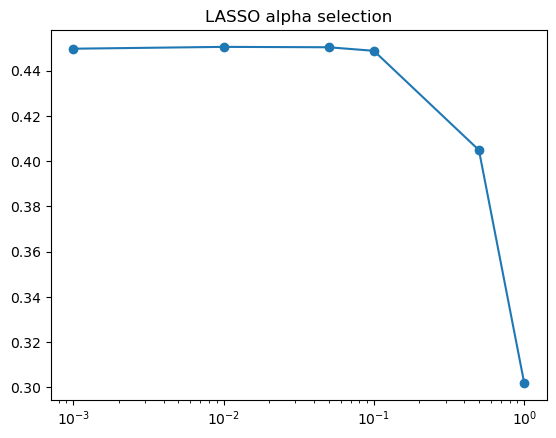

In [36]:
print("Best alpha by CV:", best_alpha, "with CV R2:", best_score)
plt.semilogx(alphas, scores, marker='o')
plt.title("LASSO alpha selection")
plt.show()

## Submit

* Save your work (File -> Save Notebook)
* Verify that your notebook runs without error by restarting the kernel (or closing and opening the notebook) and selecting the top menu item for Run -> Run All Cells.  It should run successfully all the way to the bottom.
* Save your notebook again.  Keep all the output visible when saving the final version.
* Submit the file through the Canvas Assignment.